## Predicting Heart Failure 


Heart disease is a leading cause of death among adults.  According to the World Health Organization, nearly 18 million people die each year from heart disease (WHO, 2022).  Heart failure is a common result of heart disease and is identified by a variety of factors influencing the heart’s ability to properly function.  

- age: age of the patient (years)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L) 

These are some of the clinical features to consider when predicting if a patient will die from heart failure.  A data set compiled by the University of California, Irvine showcases these factors in patients experiencing heart failure and the outcome of survival.  

**Question :**
Predicting if a patient will die of heart failure based on the clinical features mentioned above. 

In [ ]:
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following objects are masked from ‘package:readr’:

    edition_get, local_edition


The following object is masked from ‘package:tidyr’:

    matches


── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0  

## Reading the dataset

In [ ]:
heart_failure <- read_csv("https://raw.githubusercontent.com/Parcode19/Group_project/main/heart_failure_clinical_records_dataset.csv")
heart_failure

Rows: 299 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (13): age, anaemia, creatinine_phosphokinase, diabetes, ejection_fractio...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
75,0,582,0,20,1,265000,1.9,130,1,0,4,1
55,0,7861,0,38,0,263358,1.1,136,1,0,6,1
65,0,146,0,20,0,162000,1.3,129,1,1,7,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
45,0,2060,1,60,0,742000,0.8,138,0,0,278,0
45,0,2413,0,38,0,140000,1.4,140,1,1,280,0
50,0,196,0,45,0,395000,1.6,136,1,1,285,0


  
## Selecting the columns to be used for the data analysis

In [ ]:
heart_data <- heart_failure |>
    select(age, 
           creatinine_phosphokinase, 
           ejection_fraction, 
           platelets, 
           serum_creatinine, 
           serum_sodium, 
           DEATH_EVENT) 
heart_data

age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,DEATH_EVENT
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
75,582,20,265000,1.9,130,1
55,7861,38,263358,1.1,136,1
65,146,20,162000,1.3,129,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮
45,2060,60,742000,0.8,138,0
45,2413,38,140000,1.4,140,0
50,196,45,395000,1.6,136,0


## Scaling the dataset for equal contributions of each columns

In [ ]:
heart_data_scaled <- heart_data |>
    mutate(scaled_age = scale(age, center = TRUE),
           scaled_creatinine_phosphokinase = scale(creatinine_phosphokinase, center = TRUE),
           scaled_ejection_fraction = scale(ejection_fraction, center = TRUE),
           scaled_platelets = scale(platelets, center = TRUE),
           scaled_serum_creatinine = scale(serum_creatinine, center = TRUE),
           scaled_serum_sodium = scale(serum_sodium, center = TRUE))
heart_data_scaled

age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,DEATH_EVENT,scaled_age,scaled_creatinine_phosphokinase,scaled_ejection_fraction,scaled_platelets,scaled_serum_creatinine,scaled_serum_sodium
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
75,582,20,265000,1.9,130,1,1.1909487,0.000165451,-1.527997920,1.678834e-02,0.48923681,-1.5015189
55,7861,38,263358,1.1,136,1,-0.4904571,7.502062717,-0.007064906,7.523048e-09,-0.28407611,-0.1417385
65,146,20,162000,1.3,129,1,0.3502458,-0.449185725,-1.527997920,-1.036336e+00,-0.09074788,-1.7281490
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
45,2060,60,742000,0.8,138,0,-1.3311599,1.5234247,1.851853222,4.893878,-0.574068459,0.3115216
45,2413,38,140000,1.4,140,0,-1.3311599,1.8872343,-0.007064906,-1.261275,0.005916232,0.7647817
50,196,45,395000,1.6,136,0,-0.9108085,-0.3976546,0.584409044,1.345974,0.199244462,-0.1417385


## Splitting the table into training and testing dataset 

In [ ]:
heart_data_split <- initial_split(heart_data_scaled, prop = 0.75, strata = DEATH_EVENT)  
heart_data_train <- training(heart_data_split)   
heart_data_test <- testing(heart_data_split)

heart_data_train
heart_data_test

age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,DEATH_EVENT,scaled_age,scaled_creatinine_phosphokinase,scaled_ejection_fraction,scaled_platelets,scaled_serum_creatinine,scaled_serum_sodium
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
49,80,30,427000,1.0,138,0,-0.9948788,-0.5172068,-0.6830351,1.6731583,-0.38074023,0.31152159
65,52,25,276000,1.3,137,0,0.3502458,-0.5460642,-1.1055165,0.1292579,-0.09074788,0.08489153
53,63,60,368000,0.8,135,0,-0.6585976,-0.5347273,1.8518532,1.0699125,-0.57406846,-0.36836860
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
55,2017,25,314000,1.10,138,1,-0.4904571,1.4791080,-1.105517,5.177891e-01,-0.284076114,0.3115216
65,258,25,198000,1.40,129,1,0.3502458,-0.3337561,-1.105517,-6.682536e-01,0.005916232,-1.7281490
55,1199,20,263358,1.83,134,1,-0.4904571,0.6360592,-1.527998,7.523048e-09,0.421571927,-0.5949987


age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,DEATH_EVENT,scaled_age,scaled_creatinine_phosphokinase,scaled_ejection_fraction,scaled_platelets,scaled_serum_creatinine,scaled_serum_sodium
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
75,582,20,265000,1.9,130,1,1.1909487,0.000165451,-1.527998,0.01678834,0.48923681,-1.50151891
65,146,20,162000,1.3,129,1,0.3502458,-0.449185725,-1.527998,-1.03633577,-0.09074788,-1.72814897
50,111,20,210000,1.9,137,1,-0.9108085,-0.485257493,-1.527998,-0.54555949,0.48923681,0.08489153
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
45,582,55,543000,1.0,132,0,-1.3311599,0.000165451,1.4293718,2.8592010,-0.3807402,-1.0482588
63,103,35,179000,0.9,136,0,0.1821052,-0.493502469,-0.2605537,-0.8625192,-0.4774043,-0.1417385
50,196,45,395000,1.6,136,0,-0.9108085,-0.397654627,0.5844090,1.3459741,0.1992445,-0.1417385


## Visualization

- These visualization are in the order, topmost being the best one.

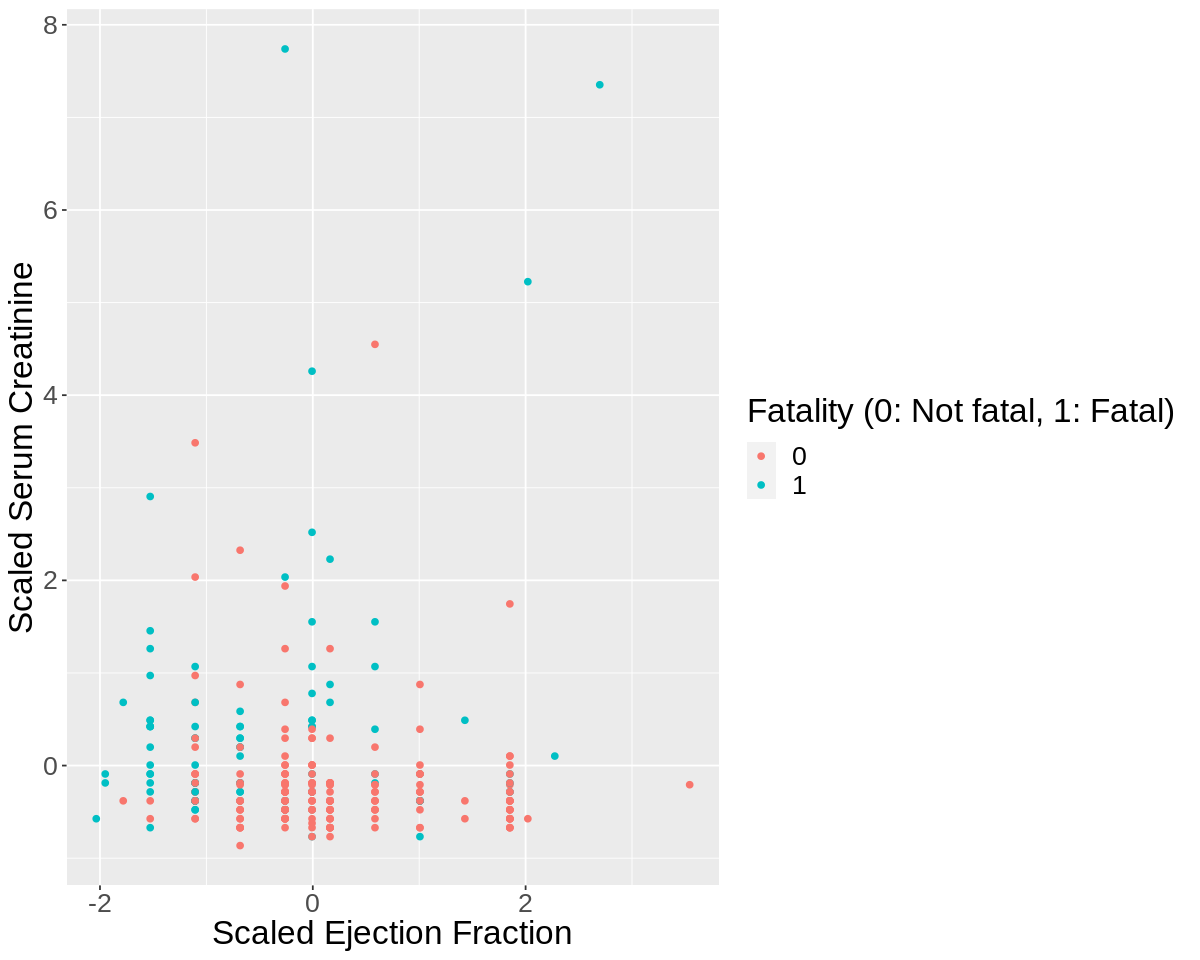

In [11]:
options(repr.plot.height = 8, repr.plot.width = 10)
plot_1 <- heart_data_scaled |>
    ggplot(aes(x = scaled_ejection_fraction, y = scaled_serum_creatinine, col = as_factor(DEATH_EVENT))) +
        geom_point() +
        labs(x = "Scaled Ejection Fraction", y = "Scaled Serum Creatinine", color = "Fatality (0: Not fatal, 1: Fatal)")+
        theme(text = element_text(size = 20)) 
        
plot_1

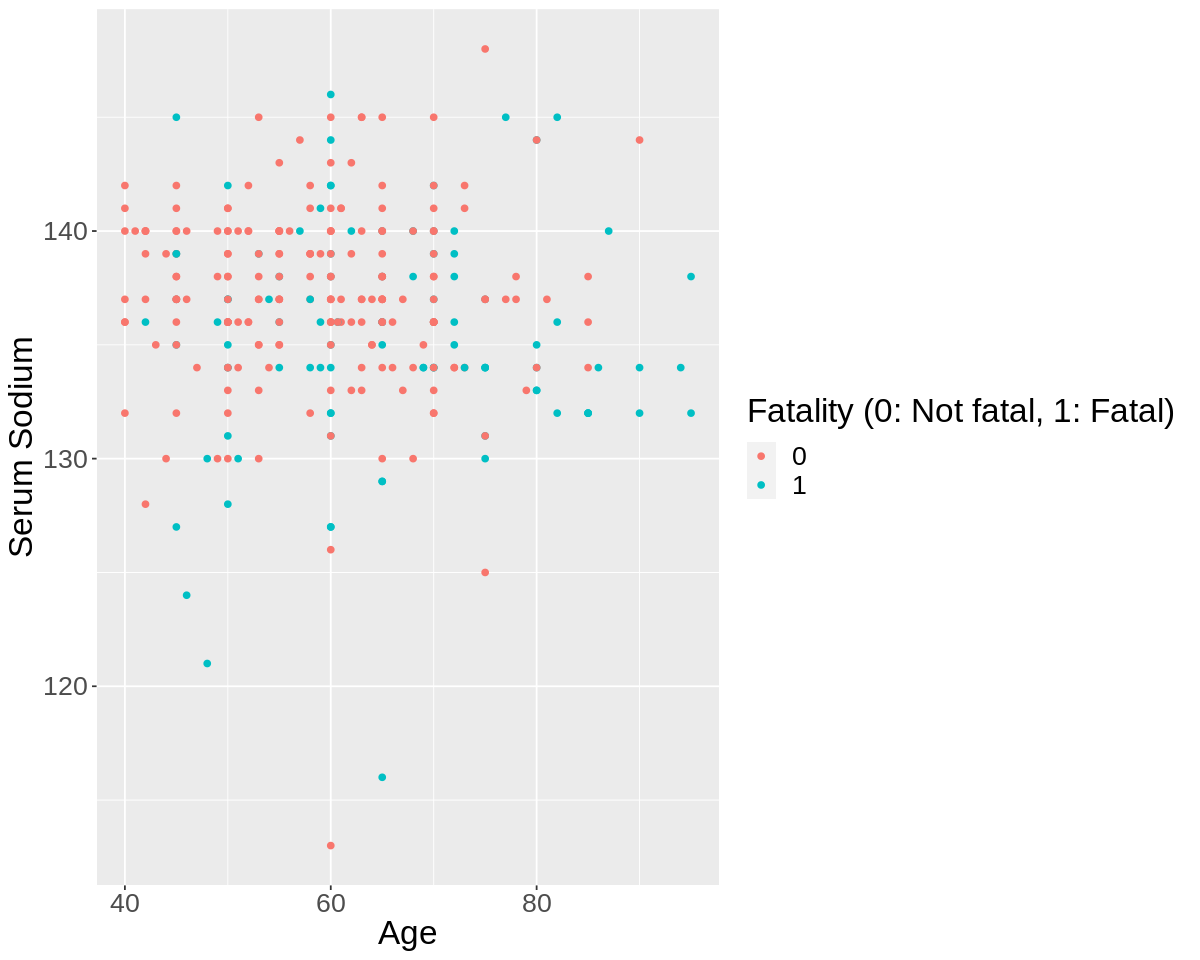

In [12]:
plot_2 <- heart_data_scaled |>
    ggplot(aes(x = age, y = serum_sodium, col = as_factor(DEATH_EVENT))) +
        geom_point() +
        labs(x = "Age", y = "Serum Sodium", color = "Fatality (0: Not fatal, 1: Fatal)") +
        theme(text = element_text(size = 20))
    
plot_2

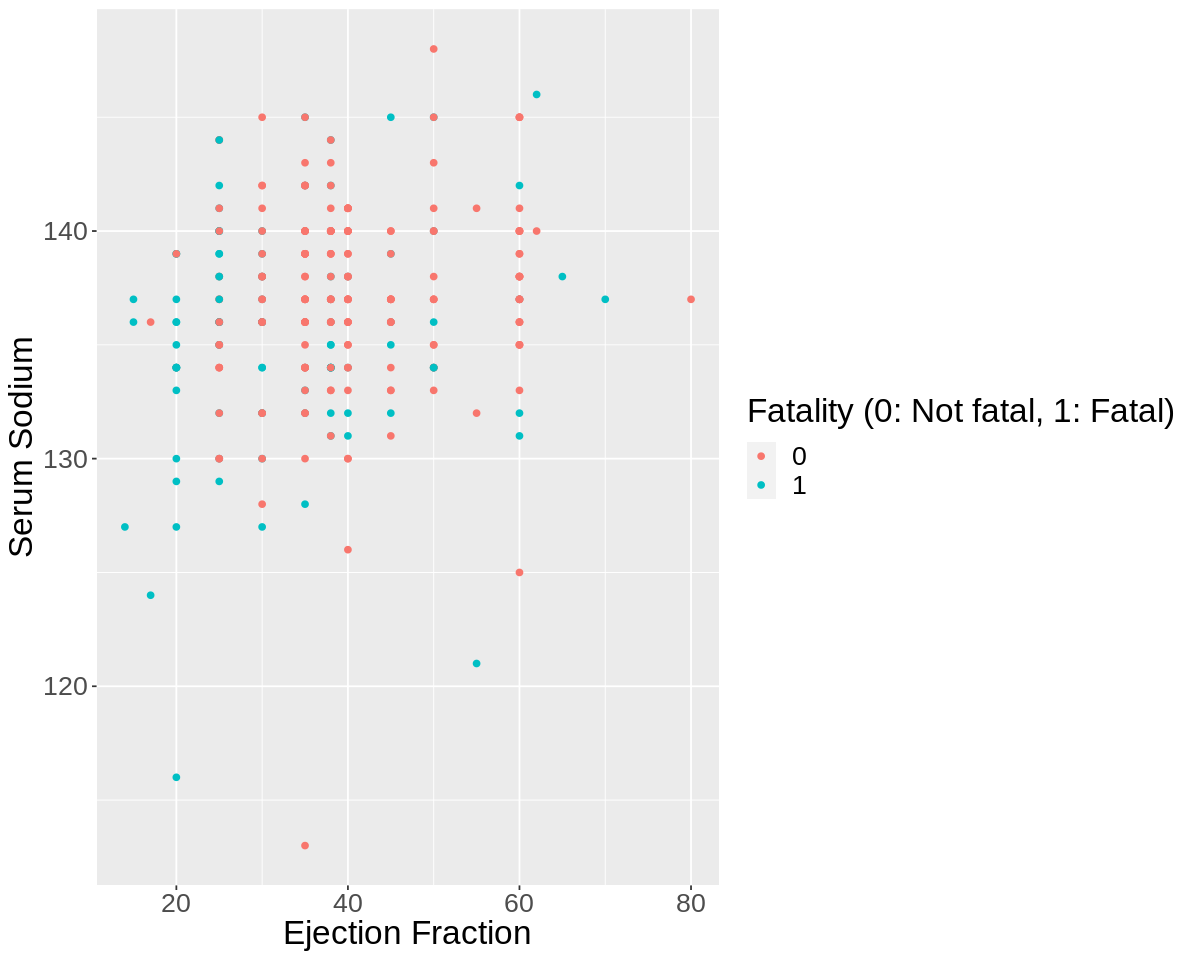

In [ ]:
plot_3 <- heart_data_scaled |>
    ggplot(aes(x = ejection_fraction, y = serum_sodium, col = as_factor(DEATH_EVENT))) +
        geom_point() +
        labs(x = "Ejection Fraction", y = "Serum Sodium", color = "Fatality (0: Not fatal, 1: Fatal)") +
        theme(text = element_text(size = 20))
    
plot_3

## Methods

- We chose to remove all of the columns which had boolean observations and were not relevant except the death event which was the column to be predicted. We then scaled the data so that each column had equal contribution in the scatter plot.

- We used the scatter plot because it was the only visualization that would give us a logical relationship . The bar was very congested and the histogram didn’t show an accurate relationship. However, going forward, we might choose to further analyze the data and try using other forms of visualizations for the final project. 

## Expected outcomes and significance:

- **What do you expect to find?**
    
    We are expected to find if our model works well enough and is successful in predicting the relationship between different factors and how they
    affect death in the case of heart failure. For example, if a person with a high amount of ejection fraction is more or less likely to encounter 
    death upon undergoing heart failure. 
   
- **What impact could such findings have?**
    
    Finding the answer to such questions will allow us to control the variables which result in death in the case of heart failure, and minimize deaths
    which occur as a result of heart failure. This will have a huge impact as it can save numerous lives because heart failure is a leading cause of 
    death amongst adults.
    
- **What future questions could this lead to?**
    
    Some future questions which might potentially arise from this analysis are:
     
    1. How accurate is the analysis performed and how can the model be improved and refined in the future for results which are more 
          precise?
    2. Can such analysis and models be applied to different diseases across the medical field and help reduce the percentage of deaths 
          occuring overall? 